#Assignment 2 - Wine Cultivar Classification 
Name : **Samita Ghale**

Student Number : **220257879**


In [133]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from matplotlib.colorbar import colorbar_factory
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap


In [34]:
# load the dataset
data_set = load_wine()
X = data_set.data
y = data_set.target
nclasses = len(data_set.target_names)

In [35]:
# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42)

0 6
[0 0 1 0 1 0 2 0 2 0 0 1 0 1 0 1 1 2 0 1 0 1 2 2 1 1 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2 0 2 1 2 0 1 0 0 2 2 2 0 0 1]
[[20  0  0]
 [ 2 14  8]
 [ 3  5  7]]


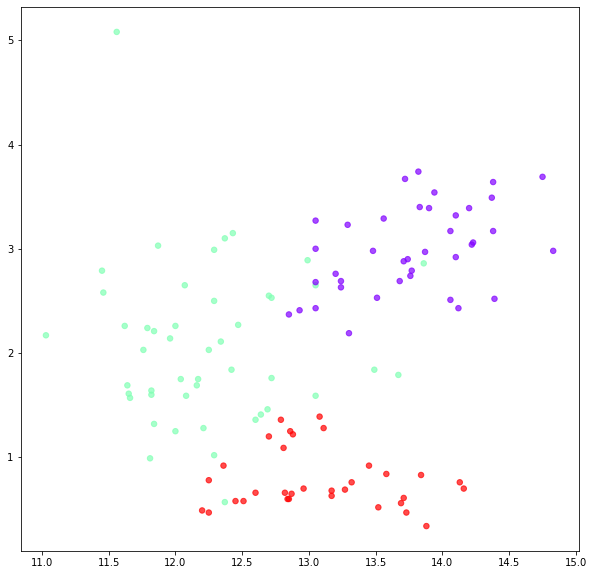

In [55]:
# selecting the best performing features from f1_score
best_mean_f1_score = 0
best_f1 = 0
best_f2 = 0

knn_clf = KNeighborsClassifier(n_neighbors=12)
for f1 in range(0,13):
    for f2 in range(0, 13):
      if f1 == f2:
        continue
      idx = [f1,f2]
      knn_clf.fit(X_train[:,idx], y_train)
      y_pred = knn_clf.predict(X_test[:,idx])
      con_mat_test = confusion_matrix(y_test, y_pred)
      current_f1 = np.mean(f1_score(y_test, y_pred, average ='macro'))
      if current_f1 > best_mean_f1_score:
          best_f1 = f1
          best_f2 = f2
          best_mean_f1_score = current_f1
          best_clf = colorbar_factory
      # print(con_mat_test)
      
# Ploting the best performing features 
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train[:,best_f1], X_train[:,best_f2], c=y_train, cmap='rainbow', alpha=0.7, s=30)
print(best_f1, best_f2 )
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)


0 6


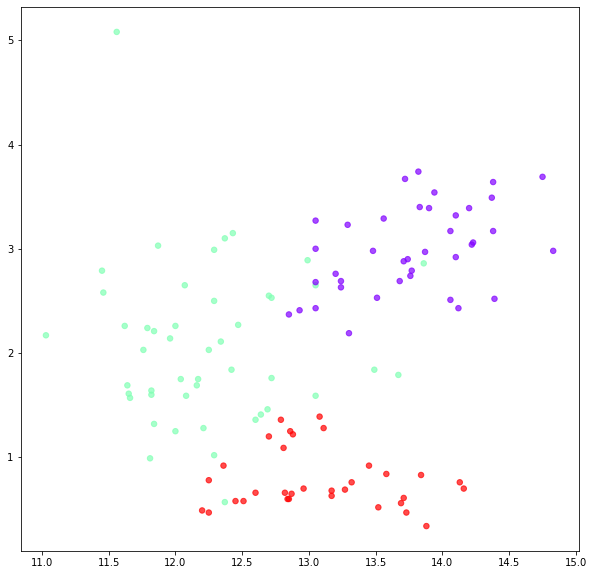

In [54]:
# OR
# selecting the best performing features from cross_val_score(..) funtion
best_performance = 0
best_f1 = 0
best_f2 = 0

knn_cvs = KNeighborsClassifier(n_neighbors=12)
for f1 in range(0,12):
    for f2 in range(0, 12):
      cv_scores = cross_val_score(knn_cvs, X[:,[f1, f2]], y, cv=5)
      if best_performance < np.mean(cv_scores):
        best_performance = np.mean(cv_scores)
        best_f1 = f1
        best_f2 = f2
# Ploting the best performing features 
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train[:,best_f1], X_train[:,best_f2], c=y_train, cmap='rainbow', alpha=0.7, s=30)
print(best_f1, best_f2 )

In [58]:
# prediction for best features :
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train[:,[best_f1, best_f2]], y_train)
best_y_pred = clf.predict(X_test[:,[best_f1, best_f2]])

# calculation for recall , precision and F1 scores for each class
# for each class using classification_report function
target = ['class-0', 'class-1', 'class-2']
print(classification_report(y_test, best_y_pred, target_names=target, digits=2, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.88      0.93        24
           2       0.88      1.00      0.94        15

    accuracy                           0.95        59
   macro avg       0.94      0.96      0.95        59
weighted avg       0.95      0.95      0.95        59



In [62]:
# OR
# manual calculation using confusion matrix
cm = confusion_matrix(y_test, best_y_pred)

# for class 0
print(cm)
tp0 = cm[0][0]
fn0 = cm[0][1] + cm[0][2]
fp0 = cm[1][0] + cm[2][0]
tn0 = cm[1][1] + cm[1][2] + cm[2][1] +cm[2][2]
# precision 
P0 = tp0/(tp0+fp0)
# recall
R0 = tp0/(tp0+fn0)
# F1 score
F0 = (2*P0*R0)/(P0 +R0)
print('for class 0 >>','recall :',R0,' precision :',P0, " f1-score :",F0)


[[20  0  0]
 [ 1 21  2]
 [ 0  0 15]]
for class 0: recall : 1.0  precision : 0.9523809523809523  f1-score : 0.975609756097561


In [63]:
# for class 1
tp1 = cm[1,1]
fn1 = cm[1,0] + cm[1,2]
fp1 = cm[0,1] + cm[2,1]
tn1 = cm[0,0] + cm[0,2] + cm[2,0] +cm[2,2]
# precision 
P1 = tp1/(tp1+fp1)
# recall
R1 = tp1/(tp1+fn1)
# F1 score
F1 = (2*P1*R1)/(P1 +R1)
print('for class 1>>','recall :',R1,' precision :',P1, " f1-score :",F1)


for class 1>> recall : 0.875  precision : 1.0  f1-score : 0.9333333333333333


In [64]:
# for class 2
tp2 = cm[2,2]
fn2 = cm[2,0] + cm[2,1]
fp2 = cm[0,2] + cm[1,2]
tn2 = cm[0,0] + cm[0,1] + cm[1,0] +cm[1,1]
# precision 
P2 = tp2/(tp2+fp2)
# recall
R2 = tp2/(tp2+fn2)
# accuracy
A2 = (tp2+tn2)/(tp2+tn2+fp2+fn2)
# F1 score
F2 = (2*P2*R2)/(P2 +R2)
print('for class 2>>','recall :',R2,' precision :',P2, " f1-score :",F2)


for class 2>> recall : 1.0  precision : 0.8823529411764706  f1-score : 0.9375


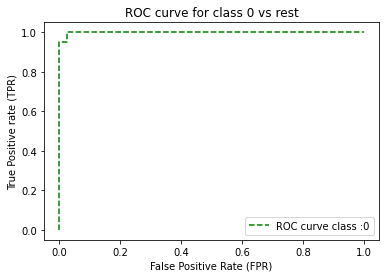

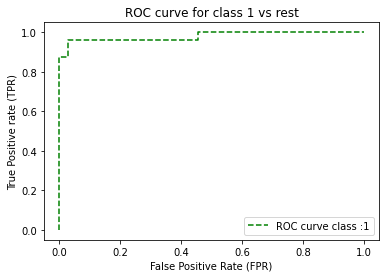

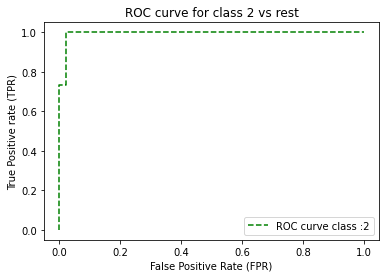

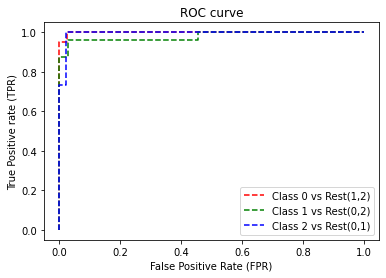

In [87]:
# ROC curve for each class

Xtrain = X_train[:,[best_f1, best_f2]]
Xtest = X_test[:,[best_f1, best_f2]]
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(Xtrain, y_train)
pred = clf.predict(Xtest)
pred_prob = clf.predict_proba(Xtest)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
# plt.figure(figsize ={12,8})
for i in range(nclasses):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    # plotting  the ROC curve    
    plt.plot(fpr[i], tpr[i], linestyle='--',color='green' ,label='ROC curve class :%0.f' % i )
    plt.title('ROC curve for class {} vs rest'.format(i))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive rate (TPR)')
    plt.legend(loc='best')
    plt.show()

# in single plot
plt.plot(fpr[0], tpr[0], linestyle='--',color='red' ,label='Class 0 vs Rest(1,2)' )
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest(0,2)')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest(0,1)')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.legend(loc='best')



In [89]:
# auc value
print("auc value for class 0 :",auc(fpr[0], tpr[0]))
print("auc value for class 1 :",auc(fpr[1], tpr[1]))
print("auc value for class 2 :",auc(fpr[2], tpr[2]))

auc value for class 0 : 0.9987179487179487
auc value for class 1 : 0.9785714285714286
auc value for class 2 : 0.993939393939394


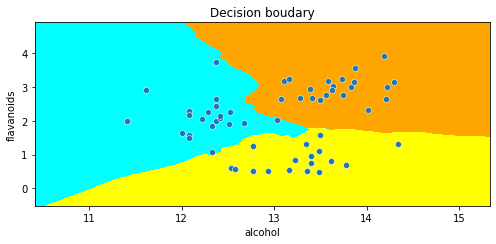

In [131]:
# decision boundaries.

clf_dc = KNeighborsClassifier(n_neighbors=12, weights='uniform')
clf_dc.fit(Xtrain, y_train)

x_min, x_max = Xtest[:, 0].min() - 1, Xtest[:, 0].max() + 1
y_min, y_max = Xtest[:, 1].min() - 1, Xtest[:, 1].max() + 1

cmap_light = ListedColormap(['orange', 'cyan', 'yellow'])
# cmap_bold = ['red', 'green', 'blue']
cmap_bold = {"class_0":'red',"class_1": 'green', "class_2": 'blue'}

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Pred = clf_dc.predict(np.c_[xx.ravel(), yy.ravel()])
Pred = Pred.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Pred, cmap=cmap_light)
sns.scatterplot(x=Xtest[:, 0], y=Xtest[:, 1], palette=cmap_bold, alpha=1.0)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("Decision boudary")
plt.xlabel(data_set.feature_names[best_f1])
plt.ylabel(data_set.feature_names[best_f2])
plt.show()